# Capstone-Project-aiml
## AIML Online Capstone - Pneumonia Detection Challenge
### Project Objectives
The objective of the project is,  Learn to how to do build an Object Detection Model  Use transfer learning to fine-tune a model.  Learn to set the optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc.  Read different research papers of given domain to obtain the knowledge of advanced models for the given problem.

## The Real Problem
### What is Pneumonia?
Pneumonia is an infection in one or both lungs. Bacteria, viruses, and fungi cause it. The infection causes inflammation in the air sacs in your lungs, which are called alveoli. Pneumonia accounts for over 15% of all deaths of children under 5 years old internationally. In 2017, 920,000 children under the age of 5 died from the disease. It requires review of a chest radiograph (CXR) by highly trained specialists and confirmation through clinical history, vital signs and laboratory exams. Pneumonia usually manifests as an area or areas of increased opacity on CXR. However, the diagnosis of pneumonia on CXR is complicated because of a number of other conditions in the lungs such as fluid overload (pulmonary edema), bleeding, volume loss (atelectasis or collapse), lung cancer, or postradiation or surgical changes. Outside of the lungs, fluid in the pleural space (pleural effusion) also appears as increased opacity on CXR. When available, comparison of CXRs of the patient taken at different time points and correlation with clinical symptoms and history are helpful in making the diagnosis. CXRs are the most commonly performed diagnostic imaging study. A number of factors such as positioning of the patient and depth of inspiration can alter the appearance of the CXR, complicating interpretation further. In addition, clinicians are faced with reading high volumes of images every shift. Pneumonia Detection Now to detection Pneumonia we need to detect Inflammation of the lungs. In this project, you’re challenged to build an algorithm to detect a visual signal for pneumonia in medical images. Specifically, your algorithm needs to automatically locate lung opacities on chest radiographs.

### Business Domain Value
Automating Pneumonia screening in chest radiographs, providing affected area details through bounding box. Assist physicians to make better clinical decisions or even replace human judgement in certain functional areas of healthcare (eg, radiology). Guided by relevant clinical questions, powerful AI techniques can unlock clinically relevant information hidden in the massive amount of data, which in turn can assist clinical decision making.

### Project Description
In this capstone project, the goal is to build a pneumonia detection system, to locate the position of inflammation in an image. Tissues with sparse material, such as lungs which are full of air, do not absorb the X-rays and appear black in the image. Dense tissues such as bones absorb X-rays and appear white in the image. While we are theoretically detecting “lung opacities”, there are lung opacities that are not pneumonia related. In the data, some of these are labeled “Not Normal No Lung Opacity”. This extra third class indicates that while pneumonia was determined not to be present, there was nonetheless some type of abnormality on the image and oftentimes this finding may mimic the appearance of true pneumonia. Dicom original images:

Medical images are stored in a special format called DICOM files (*.dcm). They contain a combination of header metadata as well as underlying raw image arrays for pixel data. Details about the data and dataset files are given in below link, https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data

#### Pre-Processing, Data Visualization, EDA
 Exploring the given Data files, classes and images of different classes.  Dealing with missing values  Visualization of different classes  Analysis from the visualization of different classes.

#### Model Building
 Building a pneumonia detection model starting from basic CNN and then improving upon it.  Train the model  To deal with large training time, save the weights so that you can use them when training the model for the second time without starting from scratch.

#### Test the Model, Fine-tuning and Repeat
 Test the model and report as per evaluation metrics  Try different models  Set different hyper parameters, by trying different optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc. for these models to fine-tune them  Report evaluation metrics for these models along with your observation on how changing different hyper parameters leads to change in the final evaluation metric.

### Reference
Acknowledgment for the datasets. https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/overview/acknowledgements

In [1]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [2]:
import random
random.seed(0)

import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install pydicom

     |████████████████████████████████| 1.9MB 5.0MB/s 


In [4]:
import os
import pandas as pd
import pydicom as dcm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import cv2
import datetime
import pytz
import multiprocessing
from sklearn.utils import shuffle
%matplotlib inline 
import imgaug.augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
import hashlib
import keras
import sklearn 
import h5py
from PIL import Image

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Install kaggle to download the dataset
!pip install -q kaggle

### Setting up kaggle to download datasets

- Please setup the kaggle_path where you have kept the kaggle.json file
- Or create the directory structure in your google drive like MyDrive/Colab/.kaggle/ and upload kaggle.json to this location

In [7]:
# Ensure you have setup kaggle.json with the required API token and saved it to your google drive mounted above.
# Provide the location of the .kaggle/kagle.json file
kaggle_path = '/content/drive/MyDrive/Colab/.kaggle/'
os.chdir(kaggle_path)
#!export KAGGLE_CONFIG_DIR=/content/drive/MyDrive/Colab/.kaggle/

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle --version

Kaggle API 1.5.4


In [8]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=37a6899edfd661b7a1f52fac0bb7c50f7e81df35079985d8f03073b6d1fe6118
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [9]:
# Kaggle api version should be 1.5.12 or higher
!kaggle --version

Kaggle API 1.5.12


### Import data 
#### Download datasets from kaggle
- Please setup the destination path where you want to install the dataset
- Or create the directory structure as MyDrive/Colab/Capstone Project/ to store the datasets in your google drive

In [10]:
project_path = '/content/drive/MyDrive/Colab/Capstone Project/'
os.chdir(project_path)
data_path = project_path + 'dataset'

if not os.path.exists(data_path):
    os.makedirs(data_path)

os.chdir(data_path)

# Downloading kaggle dataset from Pneumonia detection challenge
file_path = data_path + '/rsna-pneumonia-detection-challenge.zip'
if not os.path.exists(file_path):
  !kaggle competitions download -q -c rsna-pneumonia-detection-challenge

In [11]:
os.getcwd()

'/content/drive/MyDrive/Colab/Capstone Project/dataset'

Dataset is ready to be read and to do EDA

In [12]:
!ls

 Annotations			        rsna-pneumonia-detection-challenge.zip
 filtered_data_aug.csv		        stage_2_detailed_class_info.csv
 filtered_image_array_aug_orig.npz      stage_2_detailed_class_info_updated.csv
'GCP Credits Request Link - RSNA.txt'   stage_2_sample_submission.csv
 JPEGImages			        stage_2_test_images
 keras-frcnn			        stage_2_train_images
 merged_data_aug.csv		        stage_2_train_labels.csv
 pneumonia_data_orig_aug_res_256.npz    testImages
 pneumonia_data_resized.npz


Unzip the dataset

In [13]:
import zipfile
if not os.path.exists(data_path + '/' + 'stage_2_train_images'):
  zip_ref = zipfile.ZipFile(data_path + '/rsna-pneumonia-detection-challenge.zip', 'r')
  zip_ref.extractall()
  zip_ref.close()

In [14]:
!ls

 Annotations			        rsna-pneumonia-detection-challenge.zip
 filtered_data_aug.csv		        stage_2_detailed_class_info.csv
 filtered_image_array_aug_orig.npz      stage_2_detailed_class_info_updated.csv
'GCP Credits Request Link - RSNA.txt'   stage_2_sample_submission.csv
 JPEGImages			        stage_2_test_images
 keras-frcnn			        stage_2_train_images
 merged_data_aug.csv		        stage_2_train_labels.csv
 pneumonia_data_orig_aug_res_256.npz    testImages
 pneumonia_data_resized.npz


Load Labels

In [15]:
labels_df = pd.read_csv(data_path + '/stage_2_train_labels.csv')
labels_df.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [16]:
det_class_info_df = pd.read_csv(data_path + '/stage_2_detailed_class_info.csv')
det_class_info_df.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


Remove Duplicates & merge the dataframes into one
- Merge based on patient id

In [17]:
det_class_info_df = det_class_info_df.drop_duplicates().reset_index(drop=True)

merged_class_df = labels_df.merge(det_class_info_df, left_on='patientId', right_on='patientId', how='inner')
merged_class_df.head()

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


In [18]:
# Also, created the list of unique class labels and targets 
det_class_info_df['Target'] = det_class_info_df['class'].apply(lambda x: 1 if x =='Lung Opacity' else 0)
det_class_info_df.head()

,patientId,class,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,0
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,1


In [19]:
# As Expected the shape of merged df is higher than det_class_info_df. 
# Because the merged df has multiple entries of a single patientId having multiple bounding boxes.
print(merged_class_df.shape, det_class_info_df.shape, labels_df.shape)

(30227, 7) (26684, 3) (30227, 6)


### Exploratory Data Analysis

#### 1. Analyzing Class distribution

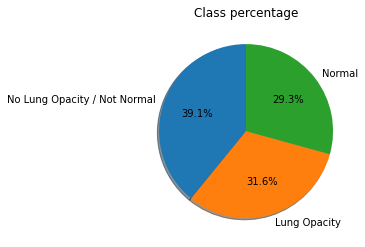

In [20]:
class_info=merged_class_df["class"].value_counts()
labels = (np.array(class_info.index))
sizes = (np.array((class_info / class_info.sum())*100))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Class percentage")
plt.show()

#### 2. Class distriution with Target class

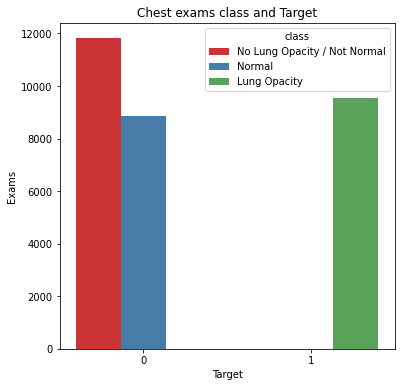

In [21]:
fig, ax = plt.subplots(nrows=1,figsize=(6,6))
tmp = merged_class_df.groupby('Target')['class'].value_counts()
df = pd.DataFrame(data={'Exams': tmp.values}, index=tmp.index).reset_index()
sns.barplot(ax=ax,x = 'Target', y='Exams',hue='class',data=df, palette='Set1')
plt.title("Chest exams class and Target")
plt.show()

#### 3. Visualizing the images

- To validate the resized array against the original image, we are first going to plot the original images and then their resized images

In [22]:
# This function is to visualize the actual image and the bounding boxes
def plot_dcm_images(ax, patientId, c, bb_box=False):
  dcm_array = dcm.read_file(data_path +'/' + 'stage_2_train_images/' + patientId + '.dcm')
  ax[c//3, c%3].imshow(dcm_array.pixel_array, cmap=plt.cm.bone)
  #print(dcm_array.pixel_array.shape)
  ax[c//3, c%3].set_title('ID: {}\n'.format(patientId))  
  if bb_box:
    for idx, row in merged_class_df[merged_class_df['patientId']==patientId].iterrows():
      #print(idx)
      ax[c//3, c%3].add_patch(Rectangle(xy=(row['x'], row['y']),
                 width=row['width'],height=row['height'],
                 linewidth=1, edgecolor='r', facecolor='none'))

##### a. Visualizing original images and bounding boxes

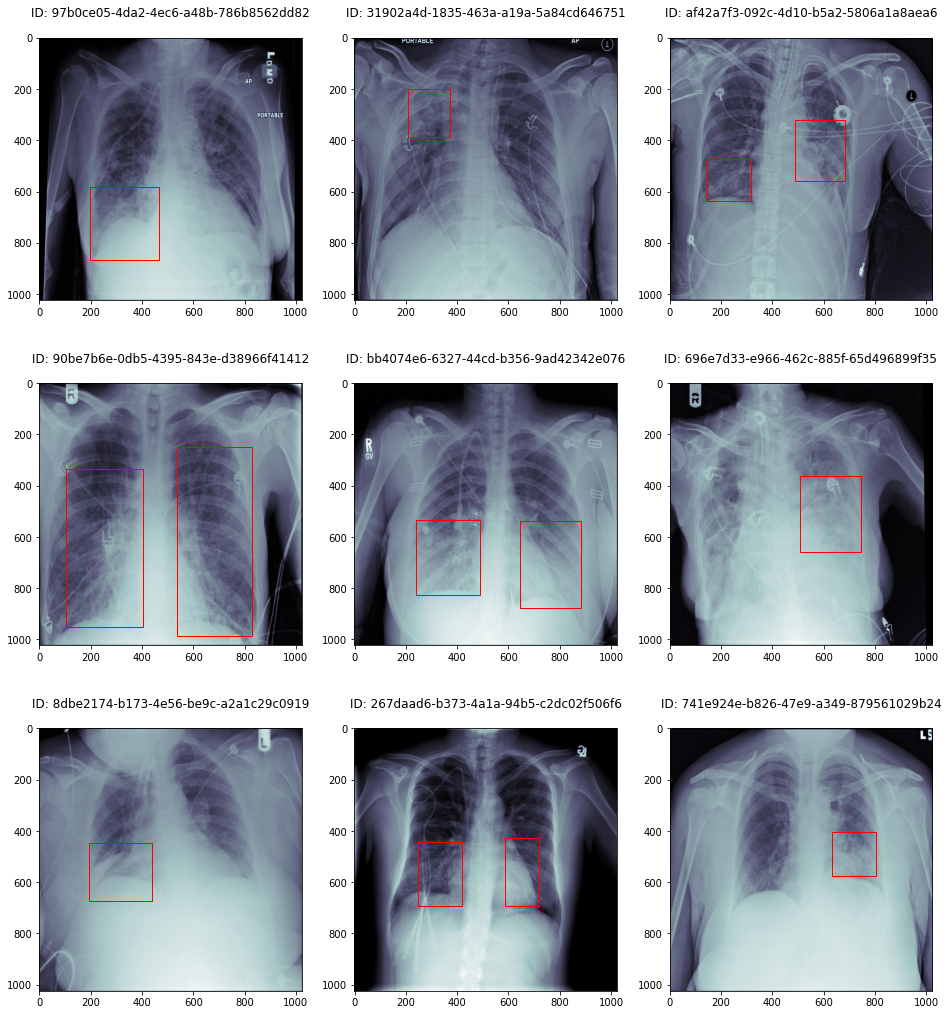

In [183]:
# Visualizing the original images and bounding boxes
c = 0
f, ax = plt.subplots(3,3, figsize=(16,18))
# Array for storing the ids that can be used to display DCM 
image_ids=[]
# Target = 1
for patientId in det_class_info_df[det_class_info_df['Target']==1].patientId.sample(9):
  image_ids.append(patientId)
  plot_dcm_images(ax, patientId, c, True)
  c = c + 1

In [184]:
# Saved list of patient ID's for visualizing the resized images
for patientID in image_ids:
  print(patientID)

97b0ce05-4da2-4ec6-a48b-786b8562dd82
31902a4d-1835-463a-a19a-5a84cd646751
af42a7f3-092c-4d10-b5a2-5806a1a8aea6
90be7b6e-0db5-4395-843e-d38966f41412
bb4074e6-6327-44cd-b356-9ad42342e076
696e7d33-e966-462c-885f-65d496899f35
8dbe2174-b173-4e56-be9c-a2a1c29c0919
267daad6-b373-4a1a-94b5-c2dc02f506f6
741e924e-b826-47e9-a349-879561029b24


##### b. Visualizing resized images and readjusted bounding box coordinates

In [185]:
# Pass bb_box as True for target 1 to draw bounding boxes
def plot_images(ax, patientId, c, bb_box=False):
  idx=np.where(det_class_info_df['patientId']==patientId)
  print(idx)
  ax[c//3, c%3].imshow(resized_array[idx[0][0]], cmap=plt.cm.bone)
  scale = target_img_size / 1024
  ax[c//3, c%3].set_title('ID: {}\n'.format(patientId))
  if bb_box:
    for idx, row in merged_class_df[merged_class_df['patientId']==patientId].iterrows():
      ax[c//3, c%3].add_patch(Rectangle(xy=(row['x']*scale, row['y']*scale),
                 width=row['width']*scale,height=row['height']*scale,
                 linewidth=2, edgecolor="white",fill=False))

(array([13731]),)


IndexError: ignored

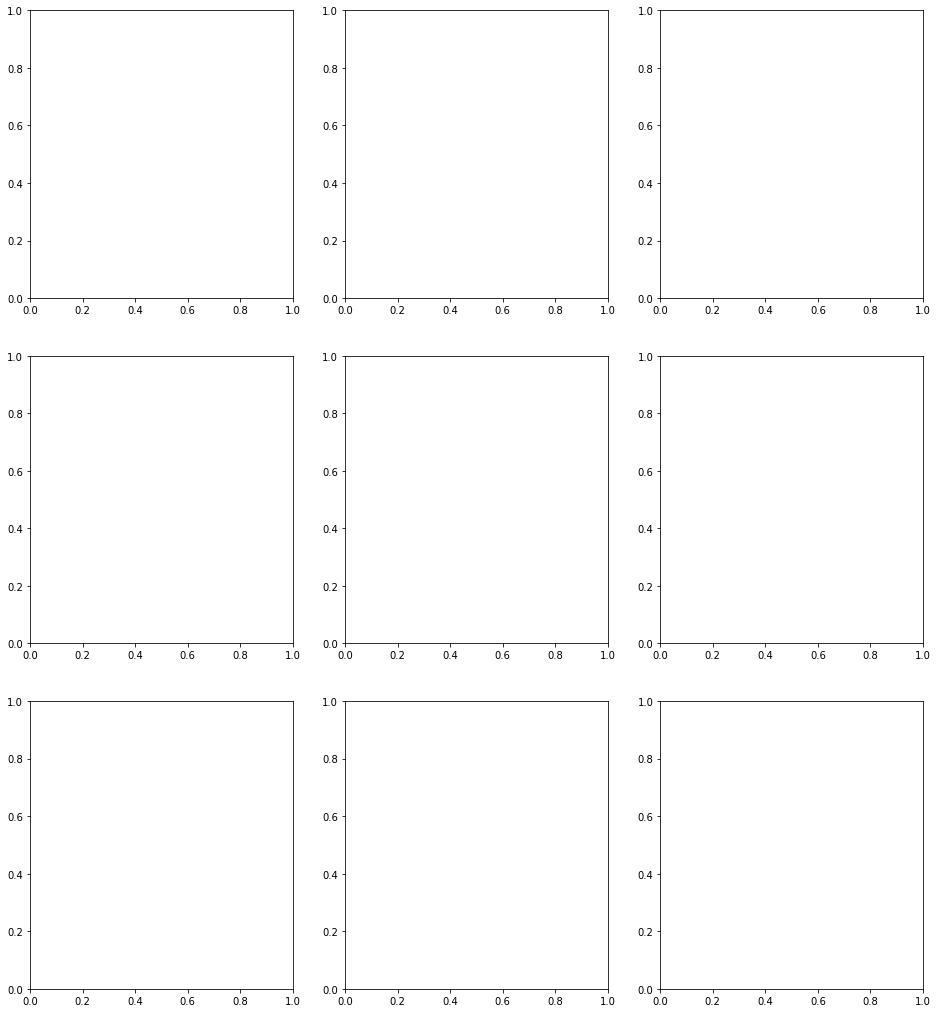

In [186]:
c = 0
f, ax = plt.subplots(3,3, figsize=(16,18))
# Array for storing the ids that can be used to display DCM 
#image_ids1=[]
# Target = 0
for patientId in image_ids:
  #image_ids1.append(patientId)
  plot_images (ax, patientId, c, True)
  c = c + 1

##### c. Visualize images without Pneumonia 

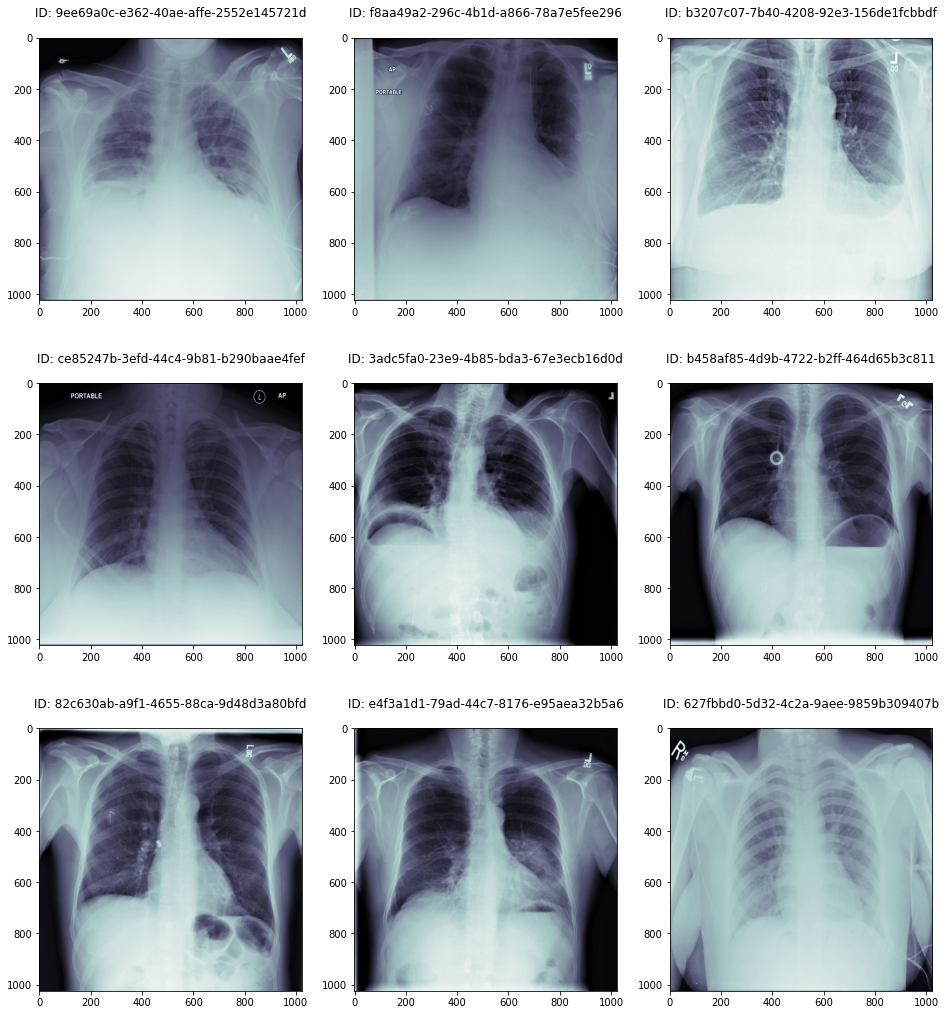

In [187]:
c = 0
f, ax = plt.subplots(3,3, figsize=(16,18))
# Array for storing the ids that can be used to display DCM 
image_ids1=[]
# Target = 0
for patientId in det_class_info_df[det_class_info_df['Target']==0].patientId.sample(9):
  image_ids1.append(patientId)
  plot_dcm_images (ax, patientId, c, False)
  c = c + 1

#### 5. Distribution of Bounding Boxes

In [188]:
bbox_df = merged_class_df.groupby('patientId').count().reset_index()
print(bbox_df.shape)
bbox_df.head()

(26684, 7)


,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0,0,0,0,1,1
1,000924cf-0f8d-42bd-9158-1af53881a557,0,0,0,0,1,1
2,000db696-cf54-4385-b10b-6b16fbb3f985,2,2,2,2,2,2
3,000fe35a-2649-43d4-b027-e67796d412e0,2,2,2,2,2,2
4,001031d9-f904-4a23-b3e5-2c088acd19c6,2,2,2,2,2,2


In [189]:
bbox_df.groupby('x').count().reset_index()

,x,patientId,y,width,height,Target,class
0,0,20672,20672,20672,20672,20672,20672
1,1,2614,2614,2614,2614,2614,2614
2,2,3266,3266,3266,3266,3266,3266
3,3,119,119,119,119,119,119
4,4,13,13,13,13,13,13


Observation:
- Number of patients without any bounding box = 20672
- Number of patients with 1 bounding box = 2614
- Number of patients with 2 bounding boxes = 3266
- Number of patients with 3 bounding boxes = 119
- Number of patients with 4 bounding boxes = 13

Most commmon cases of Pneumonia have 2 bounding boxes

### Data Pre-processing
- Missing data treatment - Imputing NaN (for normal cases) with 0 values
- Resizing labels data
- Image augmentation
- train test split


#### 1. Missing data treatment - Imputing NaN (for normal cases) with 0 values


In [23]:
merged_class_df.head()

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


In [24]:
# Check for missing values
merged_class_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ MB


In [25]:
# Check for Pneumonia detected case count
merged_class_df[merged_class_df['Target'] == 1].count()

patientId    9555
x            9555
y            9555
width        9555
height       9555
Target       9555
class        9555
dtype: int64

##### Observation: 
- Pneumonia cases = 9555, 
- Non-null values for x, y, width, height columns = 9555

That means all the remaining values in x, y, width and height columns are NaN and can be replaced with 0 for training the model

#### 2. Duplicate image detection

In [28]:
def md5Checksum(file):
  with open(data_path + '/' + 'stage_2_train_images' + '/' + file + '.dcm', "rb") as f:
    bytes = f.read()
    file_hash = hashlib.md5(bytes).hexdigest()
  return file_hash

In [29]:
# Checksum to identify duplicate images
labels_df = pd.read_csv(data_path + '/stage_2_train_labels.csv')
det_class_info_df = pd.DataFrame()
if not os.path.exists(data_path + '/stage_2_detailed_class_info_updated.csv'):
  det_class_info_df = pd.read_csv(data_path + '/stage_2_detailed_class_info.csv')
  # Removing duplicates
  det_class_info_df=det_class_info_df.drop_duplicates().reset_index(drop=True)
  det_class_info_df['Target'] = det_class_info_df['class'].apply(lambda x: 1 if x =='Lung Opacity' else 0)
  filelist= det_class_info_df['patientId'].to_numpy()
  # Checksum to identify duplicate images
  checksum=[]
  for file in filelist:
    checksum.append(md5Checksum(file))
  checksum = np.array(checksum)
  det_class_info_df['checksum'] = checksum
  det_class_info_df.to_csv(data_path + '/stage_2_detailed_class_info_updated.csv')
else:
  det_class_info_df = pd.read_csv(data_path + '/stage_2_detailed_class_info_updated.csv', index_col=[0])

In [30]:
det_class_info_df.to_csv(data_path + '/stage_2_detailed_class_info_updated.csv')

In [31]:
print ('There are', det_class_info_df['checksum'].nunique(), 'unique checksum values')
print('There are', det_class_info_df['patientId'].nunique(), 'unique patients')

There are 26684 unique checksum values
There are 26684 unique patients


Observation:
- There are no duplicate images

In [32]:
merged_class_df = labels_df.merge(det_class_info_df[['patientId','class', 'checksum']], left_on='patientId', right_on='patientId', how='inner')
print(merged_class_df.shape)
merged_class_df.head()

(30227, 8)


,patientId,x,y,width,height,Target,class,checksum
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,78f614e5b22357018e0c50f08bddb412
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,ee3b52fc977cbf1e4c2210b29221e630
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,0cdb347053dd580952be05667c20a593
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal,d016ec2dd9a89189afba8183c12a9e1e
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity,12657f14d27e815bd3026c6ffdfbae3b


#### 3. Filter Data

In [33]:
def filterPatientsByCriteria(criterion):
    x = 1
    for key in criterion.keys():
      if (x==1):
        filt_class_df = det_class_info_df[det_class_info_df['class']==key].sample(int(criterion.get(key)))
      else:
        filt_class_df=filt_class_df.append(det_class_info_df[det_class_info_df['class']==key].sample(int(criterion.get(key))))
      x = x + 1
    return filt_class_df

In [34]:
def generateAugmentationList(filt_class_df, augm_count):
  rowlist=[]
  augm_data=[]
  for i in range(augm_count):
    exists=True 
    while exists:
      n=random.randint(0,filt_class_df.shape[0]-1)
      if n in rowlist:
        exists=True
      else:
        rowlist.append(n)
        row = filt_class_df.iloc[n]
        augm_data.append(['xxx ' + row['patientId'], row['class'], row['Target'], 'aug'])
        exists=False
  filt_class_df=filt_class_df.append(pd.DataFrame(augm_data, 
               columns=[ 'patientId', 'class', 'Target', 'row_type']),
               ignore_index = True)
  return filt_class_df

In [35]:
# Set the criterion = {} to load all data
criterion={'Lung Opacity':3000, 
           'No Lung Opacity / Not Normal': 400, 
           'Normal': 400}

In [36]:
filt_class_df = pd.DataFrame()
if not os.path.exists(data_path + '/' + 'filtered_data_aug.csv'):
  # Filter data based on the criterion
  filt_class_df = filterPatientsByCriteria(criterion)
  # Dropping the checksum from the filtered dataset as it is not relevant
  filt_class_df.drop(['checksum'], axis=1, inplace=True)
  # Add a new column with default value of 'orig'. The augmented row will have row_type = 'aug'
  filt_class_df['row_type'] = 'orig'
  # Append the augmented rows to the list
  filt_class_df=generateAugmentationList(filt_class_df, 3000) # Augmenting 3000 images from the filtered list
  filt_class_df=shuffle(filt_class_df)
  filt_class_df.reset_index(drop=True)
  # Export the data to CSV
  filt_class_df.to_csv(data_path + '/' + 'filtered_data_aug.csv')
else:
  filt_class_df = pd.read_csv(data_path + '/' + 'filtered_data_aug.csv')

#### 4. Image augmentation


In [37]:
def getBoundingBox(patientId, shape):
  bbs=[]
  for idx_a, row in merged_class_df[(merged_class_df['patientId']==patientId)].iterrows():
    bbs.append(BoundingBox(x1=row['x'], y1=row['y'], x2=row['x']+row['width'], y2=row['y']+row['height']))
  return BoundingBoxesOnImage(bbs, shape=shape)

In [38]:
def getImage(patientId):
  dcm_img = dcm.read_file(data_path +'/' + 'stage_2_train_images' + '/' + patientId + '.dcm').pixel_array
  return dcm_img

In [39]:
def augment(patientId, target):
  dcm_img = getImage(patientId)
  aug_bbs=None
  augmentation = iaa.Sequential([
      iaa.Fliplr(0.5),
      iaa.OneOf([ ## geometric transform
          iaa.Affine(
              scale={"x": (0.98, 1.02), "y": (0.98, 1.04)},
              translate_percent={"x": (-0.02, 0.02), "y": (-0.04, 0.04)},
              rotate=(-2, 2),
              shear=(-1, 1),
          ),
          iaa.PiecewiseAffine(scale=(0.001, 0.025)),
      ]),
      iaa.OneOf([ ## brightness or contrast
          iaa.Multiply((0.9, 1.1)),
          iaa.ContrastNormalization((0.9, 1.1)),
      ]),
      iaa.OneOf([ ## blur or sharpen
          iaa.GaussianBlur(sigma=(0.0, 0.1)),
          iaa.Sharpen(alpha=(0.0, 0.1)),
      ])
  ], random_order=True)

  det = augmentation.to_deterministic()
  aug_image = det.augment_image(dcm_img)
  if target == 1:
    bbs = getBoundingBox(patientId, dcm_img.shape)
    aug_bbs = det.augment_bounding_boxes(bbs)
  return aug_image, aug_bbs

In [40]:
def filterAndAugmentData(merged_class_df):
  image_array=[]
#  image_mask=[]
  merge_aug_data=[]
  m = 0
  count = 200
  for idx, row in filt_class_df.iterrows():
    m += 1
    if row['row_type']=='orig':
      orig_img=getImage(row['patientId'])
      image_array.append(orig_img)
    else:
      aug_image, aug_bbs = augment(row['patientId'][4: :], row['Target'])
      image_array.append(aug_image)
      if row['Target']==1:
        for i in range(len(aug_bbs.bounding_boxes)):
          aug_bb = aug_bbs.bounding_boxes[i]
          x, y, width, height = aug_bb.x1, aug_bb.y1, aug_bb.x2-aug_bb.x1, aug_bb.y2-aug_bb.y1
          merge_aug_data.append([row['patientId'], x, y, width, height, row['Target'], row['class']])
      else:
        merge_aug_data.append([row['patientId'], np.nan, np.nan, np.nan, np.nan, row['Target'], row['class']])
    if m%count == 0:
      print (str(m))

  merged_class_df=merged_class_df.append(pd.DataFrame(merge_aug_data, 
              columns=[ 'patientId', 'x', 'y', 'width', 'height', 'Target', 'class']),
              ignore_index = True)
  return merged_class_df, np.array(image_array)

In [41]:
orig_aug_array=[]
if not os.path.exists(data_path + '/' + 'filtered_image_array_aug_orig.npz'):
  merged_class_df, orig_aug_array = filterAndAugmentData(merged_class_df)
  np.savez_compressed(data_path + '/' + 'filtered_image_array_aug_orig.npz', images=orig_aug_array)
  merged_class_df.to_csv(data_path + '/' + 'merged_data_aug.csv')
else:
  orig_aug_array = np.load(data_path + '/' + 'filtered_image_array_aug_orig.npz', allow_pickle=True)['images']
  if os.path.exists(data_path + '/' + 'merged_data_aug.csv'):
    merged_class_df = pd.read_csv(data_path + '/' + 'merged_data_aug.csv')

In [42]:
print(data_path)

/content/drive/MyDrive/Colab/Capstone Project/dataset


In [43]:
print(orig_aug_array.shape, merged_class_df.shape)

(6800, 1024, 1024) (34648, 9)


In [44]:
merged_class_df.head()

,Unnamed: 0,patientId,x,y,width,height,Target,class,checksum
0,0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,78f614e5b22357018e0c50f08bddb412
1,1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,ee3b52fc977cbf1e4c2210b29221e630
2,2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,0cdb347053dd580952be05667c20a593
3,3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal,d016ec2dd9a89189afba8183c12a9e1e
4,4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity,12657f14d27e815bd3026c6ffdfbae3b


#### 5. Resize Images and bounding box labels


In [45]:
target_img_size=256
scale = target_img_size / 1024
print('Scale factor: ', scale)

Scale factor:  0.25


In [46]:
# Convert each file
def resizeImage(image):
    try:
        res_array = resize(image, (target_img_size, target_img_size), mode='symmetric')
    except Exception as e:
        print(file)
        print(e)
    return res_array;

In [47]:
type(orig_aug_array)

numpy.ndarray

In [48]:
#Loading resized image array. 
#If pneumonia_data_orig_aug_res_<>.npz doesn't exist, then resize first and save it 
resized_array=[]
if not os.path.exists(data_path + '/' + 'pneumonia_data_orig_aug_res_' + str(target_img_size) + '.npz'):
  resized_array = list(map(resizeImage, orig_aug_array))
  del orig_aug_array
  resized_array = np.array(resized_array)
  np.savez_compressed(data_path + '/' + 'pneumonia_data_orig_aug_res_' + str(target_img_size) + '.npz', images=resized_array)
  #np.savez_compressed(data_path + '/' + 'pneumonia_data_orig_aug_masks_res_' + str(target_mask_size) + '.npz', masks=resized_masks)
else:
  # del orig_aug_array
  resized_array = np.load(data_path + '/' + 'pneumonia_data_orig_aug_res_' + str(target_img_size) + '.npz', allow_pickle=True)['images']
  # if os.path.exists(data_path + '/' + 'pneumonia_data_orig_aug_masks_res_' + str(target_mask_size) + '.npz'):
  #   resized_masks = np.load(data_path + '/' + 'pneumonia_data_orig_aug_masks_res_' + str(target_mask_size) + '.npz', allow_pickle=True)['masks']
  #   resized_masks=np.array(resized_masks)

In [50]:
# del orig_aug_array

In [49]:
resized_array.shape

(6800, 256, 256)

In [51]:
# Meged Class df has original data plus the augmented data
merged_class_df.rename(columns= {'Unnamed: 0': 'idx'}, inplace=True)
print(merged_class_df.shape)
merged_class_df.head()

(34648, 9)


,idx,patientId,x,y,width,height,Target,class,checksum
0,0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,78f614e5b22357018e0c50f08bddb412
1,1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,ee3b52fc977cbf1e4c2210b29221e630
2,2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,0cdb347053dd580952be05667c20a593
3,3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal,d016ec2dd9a89189afba8183c12a9e1e
4,4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity,12657f14d27e815bd3026c6ffdfbae3b


In [52]:
# Filtered Class df has filtered data along with augmented data
filt_class_df.rename(columns= {'Unnamed: 0': 'idx'}, inplace=True)
print(filt_class_df.shape)
filt_class_df.head()

(6800, 5)


,idx,patientId,class,Target,row_type
0,743,1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76,Lung Opacity,1,orig
1,699,66c52ba5-c91d-4f0c-af96-18148fd9dd66,Lung Opacity,1,orig
2,4447,xxx 2a55f0bc-4943-4473-8f08-5c0a36fdc929,Normal,0,aug
3,382,3862449a-cc8b-40da-91a0-a1437618e65c,Lung Opacity,1,orig
4,3671,b4bd9d9f-9dee-47f0-a734-afbfb0e554cf,Normal,0,orig


- As the images have been resized, the coordinates  also need to be resized accordingly

In [53]:
new_filtered_df = filt_class_df.merge(merged_class_df, how='inner', on='patientId')
print(new_filtered_df.shape)
new_filtered_df.head()

(10017, 13)


,idx_x,patientId,class_x,Target_x,row_type,idx_y,x,y,width,height,Target_y,class_y,checksum
0,743,1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76,Lung Opacity,1,orig,29565,174.0,423.0,163.0,142.0,1,Lung Opacity,2da0e01f61c2ba9323a653c3e3cd39a2
1,743,1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76,Lung Opacity,1,orig,29566,563.0,449.0,116.0,146.0,1,Lung Opacity,2da0e01f61c2ba9323a653c3e3cd39a2
2,699,66c52ba5-c91d-4f0c-af96-18148fd9dd66,Lung Opacity,1,orig,9366,291.0,249.0,164.0,213.0,1,Lung Opacity,461519228a225544d27564a07c90693e
3,4447,xxx 2a55f0bc-4943-4473-8f08-5c0a36fdc929,Normal,0,aug,30227,NaN,NaN,NaN,NaN,0,Normal,NaN
4,382,3862449a-cc8b-40da-91a0-a1437618e65c,Lung Opacity,1,orig,3439,615.0,116.0,332.0,662.0,1,Lung Opacity,2586d85e3f580220f84cf952376daf25


In [54]:
scale = target_img_size / 1024
print('Scaling factor for coordinates: ', scale)

Scaling factor for coordinates:  0.25


In [55]:
# new_filtered_df['x'] = new_filtered_df['x']*scale
# new_filtered_df['y'] = new_filtered_df['y']*scale
# new_filtered_df['width'] = new_filtered_df['width']*scale
# new_filtered_df['height'] = new_filtered_df['height']*scale
new_filtered_df.describe()

,idx_x,Target_x,idx_y,x,y,width,height,Target_y
count,10017.000000,10017.000000,10017.000000,8588.000000,8588.000000,8588.000000,8588.000000,10017.000000
mean,3331.586902,0.857343,22437.879006,396.665873,365.496339,221.243791,331.549489,0.857343
std,2006.200419,0.349741,11119.538208,205.950132,149.783742,60.066206,158.165425,0.349741
min,0.000000,0.000000,4.000000,0.000000,-35.157234,50.000000,47.000000,0.000000
25%,1568.000000,1.000000,13549.000000,204.000000,248.000000,178.157126,205.000000,1.000000
50%,3212.000000,1.000000,26941.000000,344.000000,365.000000,220.000000,301.000000,1.000000
75%,5113.000000,1.000000,32143.000000,593.696648,476.000000,262.000000,442.000000,1.000000
max,6799.000000,1.000000,34647.000000,835.000000,881.000000,494.000000,972.357615,1.000000


- After resize with target_img_size = 256, the max coordinates is always less than the target_img_size

In [56]:
new_filtered_df.head()

,idx_x,patientId,class_x,Target_x,row_type,idx_y,x,y,width,height,Target_y,class_y,checksum
0,743,1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76,Lung Opacity,1,orig,29565,174.0,423.0,163.0,142.0,1,Lung Opacity,2da0e01f61c2ba9323a653c3e3cd39a2
1,743,1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76,Lung Opacity,1,orig,29566,563.0,449.0,116.0,146.0,1,Lung Opacity,2da0e01f61c2ba9323a653c3e3cd39a2
2,699,66c52ba5-c91d-4f0c-af96-18148fd9dd66,Lung Opacity,1,orig,9366,291.0,249.0,164.0,213.0,1,Lung Opacity,461519228a225544d27564a07c90693e
3,4447,xxx 2a55f0bc-4943-4473-8f08-5c0a36fdc929,Normal,0,aug,30227,NaN,NaN,NaN,NaN,0,Normal,NaN
4,382,3862449a-cc8b-40da-91a0-a1437618e65c,Lung Opacity,1,orig,3439,615.0,116.0,332.0,662.0,1,Lung Opacity,2586d85e3f580220f84cf952376daf25


In [57]:
# Drop class_x, class_y, checksum, idx_x and idx_y, rows_type, 
new_filtered_df.drop(columns=['idx_x', 'idx_y', 'class_x', 'class_y', 'checksum', 'Target_x', 'row_type'], inplace=True)
new_filtered_df.head(10)

,patientId,x,y,width,height,Target_y
0,1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76,174.000000,423.000000,163.000000,142.000000,1
1,1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76,563.000000,449.000000,116.000000,146.000000,1
2,66c52ba5-c91d-4f0c-af96-18148fd9dd66,291.000000,249.000000,164.000000,213.000000,1
3,xxx 2a55f0bc-4943-4473-8f08-5c0a36fdc929,NaN,NaN,NaN,NaN,0
4,3862449a-cc8b-40da-91a0-a1437618e65c,615.000000,116.000000,332.000000,662.000000,1
5,3862449a-cc8b-40da-91a0-a1437618e65c,241.000000,126.000000,285.000000,661.000000,1
6,b4bd9d9f-9dee-47f0-a734-afbfb0e554cf,NaN,NaN,NaN,NaN,0
7,xxx a9006409-11f0-4d8d-acff-4f5e973547b1,163.000000,523.000000,241.000000,192.000000,1
8,xxx 0fe227eb-592b-4ae5-b050-e7573d423953,25.844679,118.956282,202.990350,458.079756,1
9,xxx 0fe227eb-592b-4ae5-b050-e7573d423953,362.487173,71.773327,267.755133,520.375521,1


In [58]:
annotations_df = new_filtered_df.rename(columns={'patientId': 'filepath', 'x': 'x1', 'y': 'y1', 'width': 'x2', 'height': 'y2', 'Target_y': 'class_name'})
annotations_df.head()

,filepath,x1,y1,x2,y2,class_name
0,1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76,174.0,423.0,163.0,142.0,1
1,1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76,563.0,449.0,116.0,146.0,1
2,66c52ba5-c91d-4f0c-af96-18148fd9dd66,291.0,249.0,164.0,213.0,1
3,xxx 2a55f0bc-4943-4473-8f08-5c0a36fdc929,NaN,NaN,NaN,NaN,0
4,3862449a-cc8b-40da-91a0-a1437618e65c,615.0,116.0,332.0,662.0,1


In [59]:
annotations_df['x2'] = new_filtered_df['x'] + new_filtered_df['width']
annotations_df['y2'] = new_filtered_df['y'] + new_filtered_df['height']
annotations_df.head()

,filepath,x1,y1,x2,y2,class_name
0,1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76,174.0,423.0,337.0,565.0,1
1,1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76,563.0,449.0,679.0,595.0,1
2,66c52ba5-c91d-4f0c-af96-18148fd9dd66,291.0,249.0,455.0,462.0,1
3,xxx 2a55f0bc-4943-4473-8f08-5c0a36fdc929,NaN,NaN,NaN,NaN,0
4,3862449a-cc8b-40da-91a0-a1437618e65c,615.0,116.0,947.0,778.0,1


In [60]:
#pid = '1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76'
train_path = data_path + '/train_images/'
for i in range(new_filtered_df.shape[0]):
    annotations_df['filepath'][i] = train_path + new_filtered_df['patientId'][i] + '.jpg'

#annotations_df['filepath'] = train_path + new_filtered_df['patientId'].values + '.jpg'
annotations_df.head()

,filepath,x1,y1,x2,y2,class_name
0,/content/drive/MyDrive/Colab/Capstone Project/...,174.0,423.0,337.0,565.0,1
1,/content/drive/MyDrive/Colab/Capstone Project/...,563.0,449.0,679.0,595.0,1
2,/content/drive/MyDrive/Colab/Capstone Project/...,291.0,249.0,455.0,462.0,1
3,/content/drive/MyDrive/Colab/Capstone Project/...,NaN,NaN,NaN,NaN,0
4,/content/drive/MyDrive/Colab/Capstone Project/...,615.0,116.0,947.0,778.0,1


In [61]:
# Printing a sample image to see the filpath format
str(annotations_df['filepath'][0])

'/content/drive/MyDrive/Colab/Capstone Project/dataset/train_images/1d1c51b5-1cc9-4d0c-8073-5f1cfd598f76.jpg'

- Now writing the images from the resized array to dataset/train_images/
- OR copying the images from stage_2_train_images to train_images

In [62]:
if not os.path.exists(train_path):
  os.mkdir(train_path)
  print(train_path + ' created')

/content/drive/MyDrive/Colab/Capstone Project/dataset/train_images/ created


In [293]:
# def write_image(file, img_array):
#   cv2.imwrite(file, img_array)
#   # im = Image.fromarray(img_array)
#   # im.save(file)

# file = annotations_df['filepath'][0]
# img_array = resized_array[0]
# write_image(file, img_array)

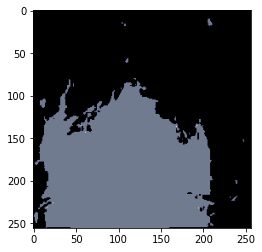

In [295]:
# image = plt.imread(file)
# plt.imshow(image, cmap=plt.cm.bone)

In [63]:
img_array.shape

NameError: ignored

In [64]:
print(data_path)
print(train_path)
source_path = data_path + '/stage_2_train_images/'
print(source_path)

/content/drive/MyDrive/Colab/Capstone Project/dataset
/content/drive/MyDrive/Colab/Capstone Project/dataset/train_images/
/content/drive/MyDrive/Colab/Capstone Project/dataset/stage_2_train_images/


In [65]:
# Below codeblock is used to copy the filtered set of files into a new directory under train_path for model training
# It checks if the filename has 'xxx' indicating its an augmented image. Its moving the original image in place of that.
import shutil
if not os.path.exists(train_path):
  os.mkdir(train_path)
  print(train_path + ' created')

os.chdir(source_path)
i = 0
files = []
for (patientID, dest_file) in zip(new_filtered_df['patientId'], annotations_df['filepath']):
  filename = patientID + '.dcm'
  files.append(filename)
  if ('xxx' in patientID):
    filename = filename.strip('xxx ')
    # print(filename)
    # print(dest_file)
    dest_file = train_path + filename
    # print(dest_file)
    # files.append(filename)
    shutil.copyfile(filename, dest_file)
  else:
    shutil.copyfile(filename, dest_file)


In [66]:
# Total number of original files copied - Augmentated files skipped
t1 = [os.listdir(train_path)]
print(len(t1[0]))

6800


In [67]:
# Total number of files processed - This includes original and augmented images
print(len(files))

10017


##### Assigning X and y variables

In [132]:
# X = resized_array
# y = filt_class_df['coordinates']

In [133]:
# print(X.shape, y.shape)

(6800, 256, 256) (6800,)


## Model Building

### a. Create the desired folder structure for Tensorflow Object Detection API

**Folder Structure**
Tensorflow_API-Custom_object_detection
- pre_trained_models
    - downloaded files for the choosen pre-trained model will come here
- dataset
    - Annotations (Annotations for your training images will come here)
    - JPEGImages (all of your images for training will come here)
    - testImages (all your images for testing will come here)
    - lable.pbtxt
    - train.record
- IG
    - inference graph of the trained model will be saved here
- CP
    - checkpoints of the trained model will be saved here
- eval.ipynb
- train.ipynb
- config file for the choosen model

In [134]:
os.chdir(project_path)
os.getcwd()

'/content/drive/MyDrive/Colab/Capstone Project'

In [135]:
# Create the main directories
!mkdir 'pre_trained_models'
!mkdir dataset
!mkdir IG
!mkdir CP
!ls

mkdir: cannot create directory ‘pre_trained_models’: File exists
mkdir: cannot create directory ‘dataset’: File exists
mkdir: cannot create directory ‘IG’: File exists
mkdir: cannot create directory ‘CP’: File exists
'AIML Capstone Project June 2021 GRP 4A _ Q&A.gsheet'   IG
 CP						        keras-frcnn
 dataset					        models
 filtered_image_array_aug_orig.npz		        pre_trained_models


In [136]:
# Create the sub-directories 
!mkdir 'dataset/JPEGImages'
!mkdir 'dataset/testImages'
!mkdir 'dataset/Annotations'


mkdir: cannot create directory ‘dataset/JPEGImages’: File exists
mkdir: cannot create directory ‘dataset/testImages’: File exists
mkdir: cannot create directory ‘dataset/Annotations’: File exists


In [137]:
!ls dataset/

 Annotations			        rsna-pneumonia-detection-challenge.zip
 filtered_data_aug.csv		        stage_2_detailed_class_info.csv
 filtered_image_array_aug_orig.npz      stage_2_detailed_class_info_updated.csv
'GCP Credits Request Link - RSNA.txt'   stage_2_sample_submission.csv
 JPEGImages			        stage_2_test_images
 merged_data_aug.csv		        stage_2_train_images
 pneumonia_data_orig_aug_res_256.npz    stage_2_train_labels.csv
 pneumonia_data_resized.npz	        testImages


### b. Setting up the Object detection API

In [138]:
!git clone https://github.com/tensorflow/models.git

fatal: destination path 'models' already exists and is not an empty directory.


In [139]:
# Change working directory to models/research
os.chdir(project_path + 'models/research/')
os.getcwd()

'/content/drive/MyDrive/Colab/Capstone Project/models/research'

In [140]:
# Check the current path variables
!env | grep -i path

LD_LIBRARY_PATH=/usr/local/nvidia/lib:/usr/local/nvidia/lib64
DATALAB_SETTINGS_OVERRIDES={"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\"172.28.0.2\""],"debugAdapterMultiplexerPath":"/usr/local/bin/dap_multiplexer"}
LIBRARY_PATH=/usr/local/cuda/lib64/stubs
PYTHONPATH=/env/python
PATH=/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin


In [141]:
# Print the current Pythonpath 
os.environ['PYTHONPATH']

'/env/python'

In [142]:
# Need to add below to pythonpaths to os environment for object detection API
pwd = os.getcwd()
print(pwd)
slim = pwd + '/slim'
print(slim)

/content/drive/MyDrive/Colab/Capstone Project/models/research
/content/drive/MyDrive/Colab/Capstone Project/models/research/slim


In [143]:
# Add above 2 into pythonpaths
os.environ['PYTHONPATH'] += ':' + pwd
os.environ['PYTHONPATH'] += ':' + slim
os.environ['PYTHONPATH']

'/env/python:/content/drive/MyDrive/Colab/Capstone Project/models/research:/content/drive/MyDrive/Colab/Capstone Project/models/research/slim'

In [144]:
#Need to run following command in order to get rid of the string_int_label_map_pb2 issue (more details https://github.com/tensorflow/models/issues/1595)
!protoc object_detection/protos/*.proto --python_out=.

### c). Convert the data to Tensorflow record format


Building a Faster RCNN model


In [75]:
# Check keras version
print(keras.__version__)

2.4.3


In [76]:
annotations_df.head()

,filepath,x1,y1,x2,y2,class_name
0,/content/drive/MyDrive/Colab/Capstone Project/...,174.0,423.0,337.0,565.0,1
1,/content/drive/MyDrive/Colab/Capstone Project/...,563.0,449.0,679.0,595.0,1
2,/content/drive/MyDrive/Colab/Capstone Project/...,291.0,249.0,455.0,462.0,1
3,/content/drive/MyDrive/Colab/Capstone Project/...,NaN,NaN,NaN,NaN,0
4,/content/drive/MyDrive/Colab/Capstone Project/...,615.0,116.0,947.0,778.0,1


In [77]:
os.chdir(data_path)
os.getcwd()

'/content/drive/MyDrive/Colab/Capstone Project/dataset'

In [78]:
# Convert annotations_df into annotations.txt for the model
if not os.path.exists('annotate.txt'):
  annot = pd.DataFrame()
  annot['format'] = annotations_df['filepath']

  # add xmin, ymin, xmax, ymax and class as per the format required
  for i in range(annot.shape[0]):
    annot['format'][i] = annot['format'][i] + ',' + str(annotations_df['x1'][i]) + ',' + str(annotations_df['y1'][i]) + ',' + str(annotations_df['x2'][i]) + ',' + str(annotations_df['y2'][i]) + ',' + str(annotations_df['class_name'][i])

  annot.to_csv('annotate.txt', header=None, index=None, sep=' ')
else:
  print('File exists')

File exists


In [79]:
if not os.path.exists('train.csv'):
  annotations_df.to_csv(data_path + '/train.csv')

In [80]:
!ls

 annotate.txt			        rsna-pneumonia-detection-challenge.zip
 Annotations			        stage_2_detailed_class_info.csv
 filtered_data_aug.csv		        stage_2_detailed_class_info_updated.csv
 filtered_image_array_aug_orig.npz      stage_2_sample_submission.csv
'GCP Credits Request Link - RSNA.txt'   stage_2_test_images
 JPEGImages			        stage_2_train_images
 keras-frcnn			        stage_2_train_labels.csv
 merged_data_aug.csv		        testImages
 pneumonia_data_orig_aug_res_256.npz    train.csv
 pneumonia_data_resized.npz	        train_images


In [81]:
if not os.path.exists('keras-frcnn'):
  !git clone https://github.com/kbardool/keras-frcnn.git

In [82]:
!mv train.csv keras-frcnn/train.csv
!mv train_images keras-frcnn/train_images
!mv annotate.txt keras-frcnn/annotate.txt

In [83]:
os.chdir('keras-frcnn')

In [84]:
os.getcwd()

'/content/drive/MyDrive/Colab/Capstone Project/dataset/keras-frcnn'

In [85]:
!ls

annotate.txt	 keras_frcnn  measure_map.py  test_frcnn.py  train_frcnn.py
environment.yml  LICENSE      README.md       train.csv      train_images


In [86]:
!python train_frcnn.py -o simple -p annotate.txt

2021-05-21 11:24:26.677856: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Traceback (most recent call last):
  File "train_frcnn.py", line 16, in <module>
    from keras_frcnn import losses as losses
  File "/content/drive/My Drive/Colab/Capstone Project/dataset/keras-frcnn/keras_frcnn/losses.py", line 4, in <module>
    if K.common.image_dim_ordering() == 'tf':
AttributeError: module 'keras.backend' has no attribute 'common'
